# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [3]:
from utils import get_train_input

/home/lrjoly/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/lrjoly/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/home/lrjoly/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/lrjoly/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/lrjoly/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/home/lrjoly/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: und

In [16]:
train_dataset = get_train_input("experiments/var_60/pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-11379226583756500423_6230_810_6250_810_with_camera_labels.tfrecord', '/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord', '/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-11566385337103696871_5740_000_5760_000_with_camera_labels.tfrecord', '/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-11219370372259322863_5320_000_5340_000_with_camera_labels.tfrecord', '/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-11454085070345530663_1905_000_1925_000_with_camera_labels.tfrecord', '/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-1083056852838271990_4080_000_4100_000_with_camera_labels.tfrecord', '/home/lrjol

INFO:tensorflow:Reading record datasets for input file: ['/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-11379226583756500423_6230_810_6250_810_with_camera_labels.tfrecord', '/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord', '/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-11566385337103696871_5740_000_5760_000_with_camera_labels.tfrecord', '/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-11219370372259322863_5320_000_5340_000_with_camera_labels.tfrecord', '/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-11454085070345530663_1905_000_1925_000_with_camera_labels.tfrecord', '/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/home/lrjoly/UDACITY/machine_learning/project/data/train/segment-1083056852838271990_4080_000_4100_000_with_camera_labels.tfrecord', '

INFO:tensorflow:Number of filenames to read: 86


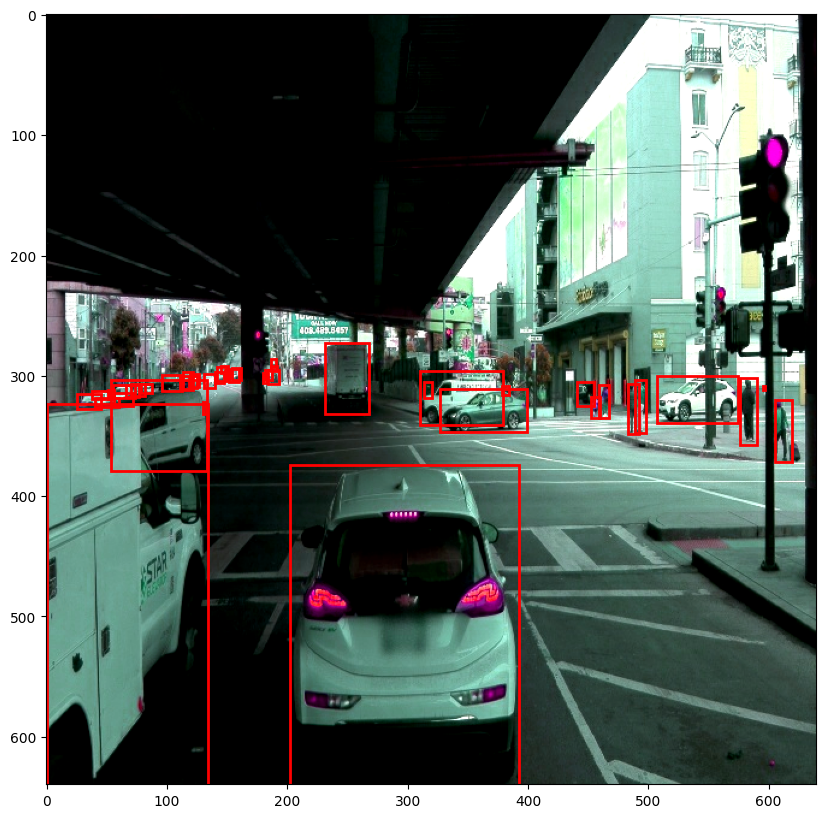

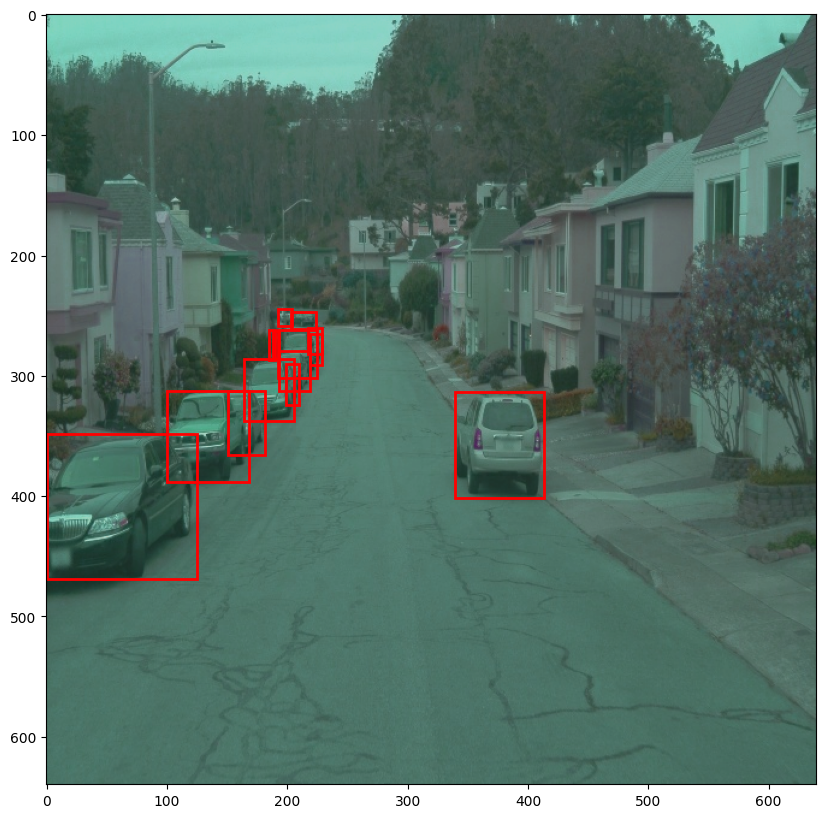

In [17]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)